## Numbers of Business in each State
## Pick up photos of the business in the top 3 state.

In [1]:
import json
import collections
import matplotlib
import matplotlib.pyplot as plt


def stateBusinessAnalyze(file) :
    stateBusiness = collections.defaultdict(list)
    with open(file) as json_file:
        result = []
        for line in json_file.readlines():
            data = json.loads(line)
            stateBusiness[data['state']].append(data["business_id"])
    return stateBusiness

def businessListInTopState(topState, file) :
    businessSet = set()
    with open(file) as json_file:
        result = []
        for line in json_file.readlines():
            data = json.loads(line)
            if data['state'] in topState:
                businessSet.add(data["business_id"])
    return businessSet



if __name__ == '__main__' :
    filtered_list = stateBusinessAnalyze(file= '../DataSets/yelp_dataset/business.json')
    businessNumber = {}
    itemList = []
    y = []
    for item, businessList in filtered_list.items():
        businessNumber[item] = len(businessList)
        itemList.append(item)
        y.append(len(businessList))
    
    
    
    itemList.sort(key = lambda x: businessNumber[x], reverse = True)
    y.sort(reverse = True)
    #print(businessNumber)
    
    x = range(len(businessNumber))
    plt.bar(x, y)
    plt.title("Numbers of business in each state")
    plt.xticks(x,itemList,rotation = 80)
    
    topThreeState = itemList[:3]
    
    businessSet = businessListInTopState(topThreeState, file= '../DataSets/yelp_dataset/business.json')
    print("businessSet")
    print(len(businessSet))
    
  
    

businessSet
126410


The food classification is one of ("food", "drink", "menu", "inside" or "outside").

We only choose the "food" category, because the "drink" category is very bad dataset since many drinks are difficult to differentiate.


The total number of picture in "AZ" is 39826, the food picture number is 22424, the food picture with a not null is 10341.

    

In [2]:
def photosInTopStateBusiness(businessSet, file) :
    photoSet = set()
    photoComment = dict()
    with open(file) as json_file:
        result = []
        for line in json_file.readlines():
            data = json.loads(line)
            #photoSet.add(data["photo_id"])
            if data['business_id'] in businessSet and data["label"] == "food" and data["caption"]:
                photoSet.add(data["photo_id"])
                photoComment[data["photo_id"]]= data["caption"]
    return photoComment


if __name__ == '__main__' :
    photoComment = photosInTopStateBusiness(businessSet, file= '../DataSets/yelp_dataset/photo.json')
    print(len(photoComment.keys()))
    with open("./foodComment.txt", "w") as commentFile:
        for food, comment in photoComment.items():
            commentFile.write(food+"\t")
            comment = comment.replace("\n", " ")
            comment = comment.replace("\r", " ")
            comment = comment.replace("\r\n", " ")
            commentFile.write(comment+"\n")

43599


# Let us manually pick several categories for the food. We assume that if the class name occurs in the caption of one food, the food belongs to that class category. 

# Let us pick the following food category.
# There is some weird characters in the foodComment.txt file, I have manually cleaned them
# The number of food is 60

foodClass 10
numofClass 10
Food pizza, Numbers 895
Food sushi, Numbers 614
Food steak, Numbers 648
Food waffles, Numbers 424
Food fried_rice, Numbers 369
Food tacos, Numbers 981
Food dumplings, Numbers 232
Food mussels, Numbers 163
Food cheesecake, Numbers 212
Food donuts, Numbers 143


([<matplotlib.axis.XTick at 0x11d5d06a0>,
 <a list of 10 Text xticklabel objects>)

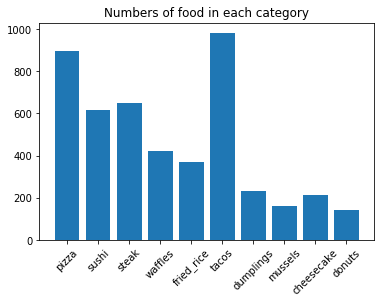

In [3]:
import collections
import matplotlib
import matplotlib.pyplot as plt

foodClass = {"cheesecake", "mussels", "waffles", "pizza", "fried_rice", "dumplings",  "steak", "tacos", "donuts", "sushi"}

print("foodClass",len(foodClass))
print("numofClass", len(foodClass))
photoIdInEachClass = collections.defaultdict(list)
with open("./foodComment.txt") as commentFile:
    for line in commentFile.readlines():
        if not line:
            continue            
        result = line.split()
        photoId = result[0]
        comment = " ".join(result[1:])
        for character in ",.!:@&-/()+?":
            comment = comment.replace(character, " ")       
        words = comment.split()
        words = [word.lower() for word in words]
 
        if "fried" in words and "rice" in words:
            photoIdInEachClass["fried_rice"].append(photoId)
            continue
        for word in words:
            if len(word)<2:
                continue
            wordminuss = word[:len(word)-1]
            wordpluss = word + "s"
            if word in foodClass:
                photoIdInEachClass[word.lower()].append(photoId)
            elif wordpluss in foodClass:
                photoIdInEachClass[wordpluss.lower()].append(photoId)
            elif wordminuss in foodClass:
                photoIdInEachClass[wordminuss.lower()].append(photoId)
    
for foodName, photos in photoIdInEachClass.items():
    print("Food %s, Numbers %d"%(foodName,len(photos)))

xLabels = photoIdInEachClass.keys()
x = range(len(xLabels))
y = [len(photoList) for photoList in  photoIdInEachClass.values()]
plt.bar(x, y)
plt.title("Numbers of food in each category")
plt.xticks(x,xLabels,rotation = 45)

In [5]:
import os
from shutil import copy
import random


def prepare_data(food, src,dest):
    print("Food ", food)
    if not os.path.exists(os.path.join(dest,food)):
        os.makedirs(os.path.join(dest,food))
    for photoId in photoIdInEachClass[food]:
        photoId = photoId+".jpg"
        copy(os.path.join(src, photoId),os.path.join(dest, food, photoId))
    print("Copying Finished!")
             
for food in foodClass:
    prepare_data(food, "../DataSets/yelp_photos/photos", "./cleanedDatasets")

Food  pizza
Copying Finished!
Food  dumplings
Copying Finished!
Food  steak
Copying Finished!
Food  cheesecake
Copying Finished!
Food  tacos
Copying Finished!
Food  mussels
Copying Finished!
Food  waffles
Copying Finished!
Food  donuts
Copying Finished!
Food  fried_rice
Copying Finished!
Food  sushi
Copying Finished!


['pizza', 'dumplings', 'steak', 'cheesecake', 'tacos', 'mussels', 'waffles', 'donuts', 'fried_rice', 'sushi']


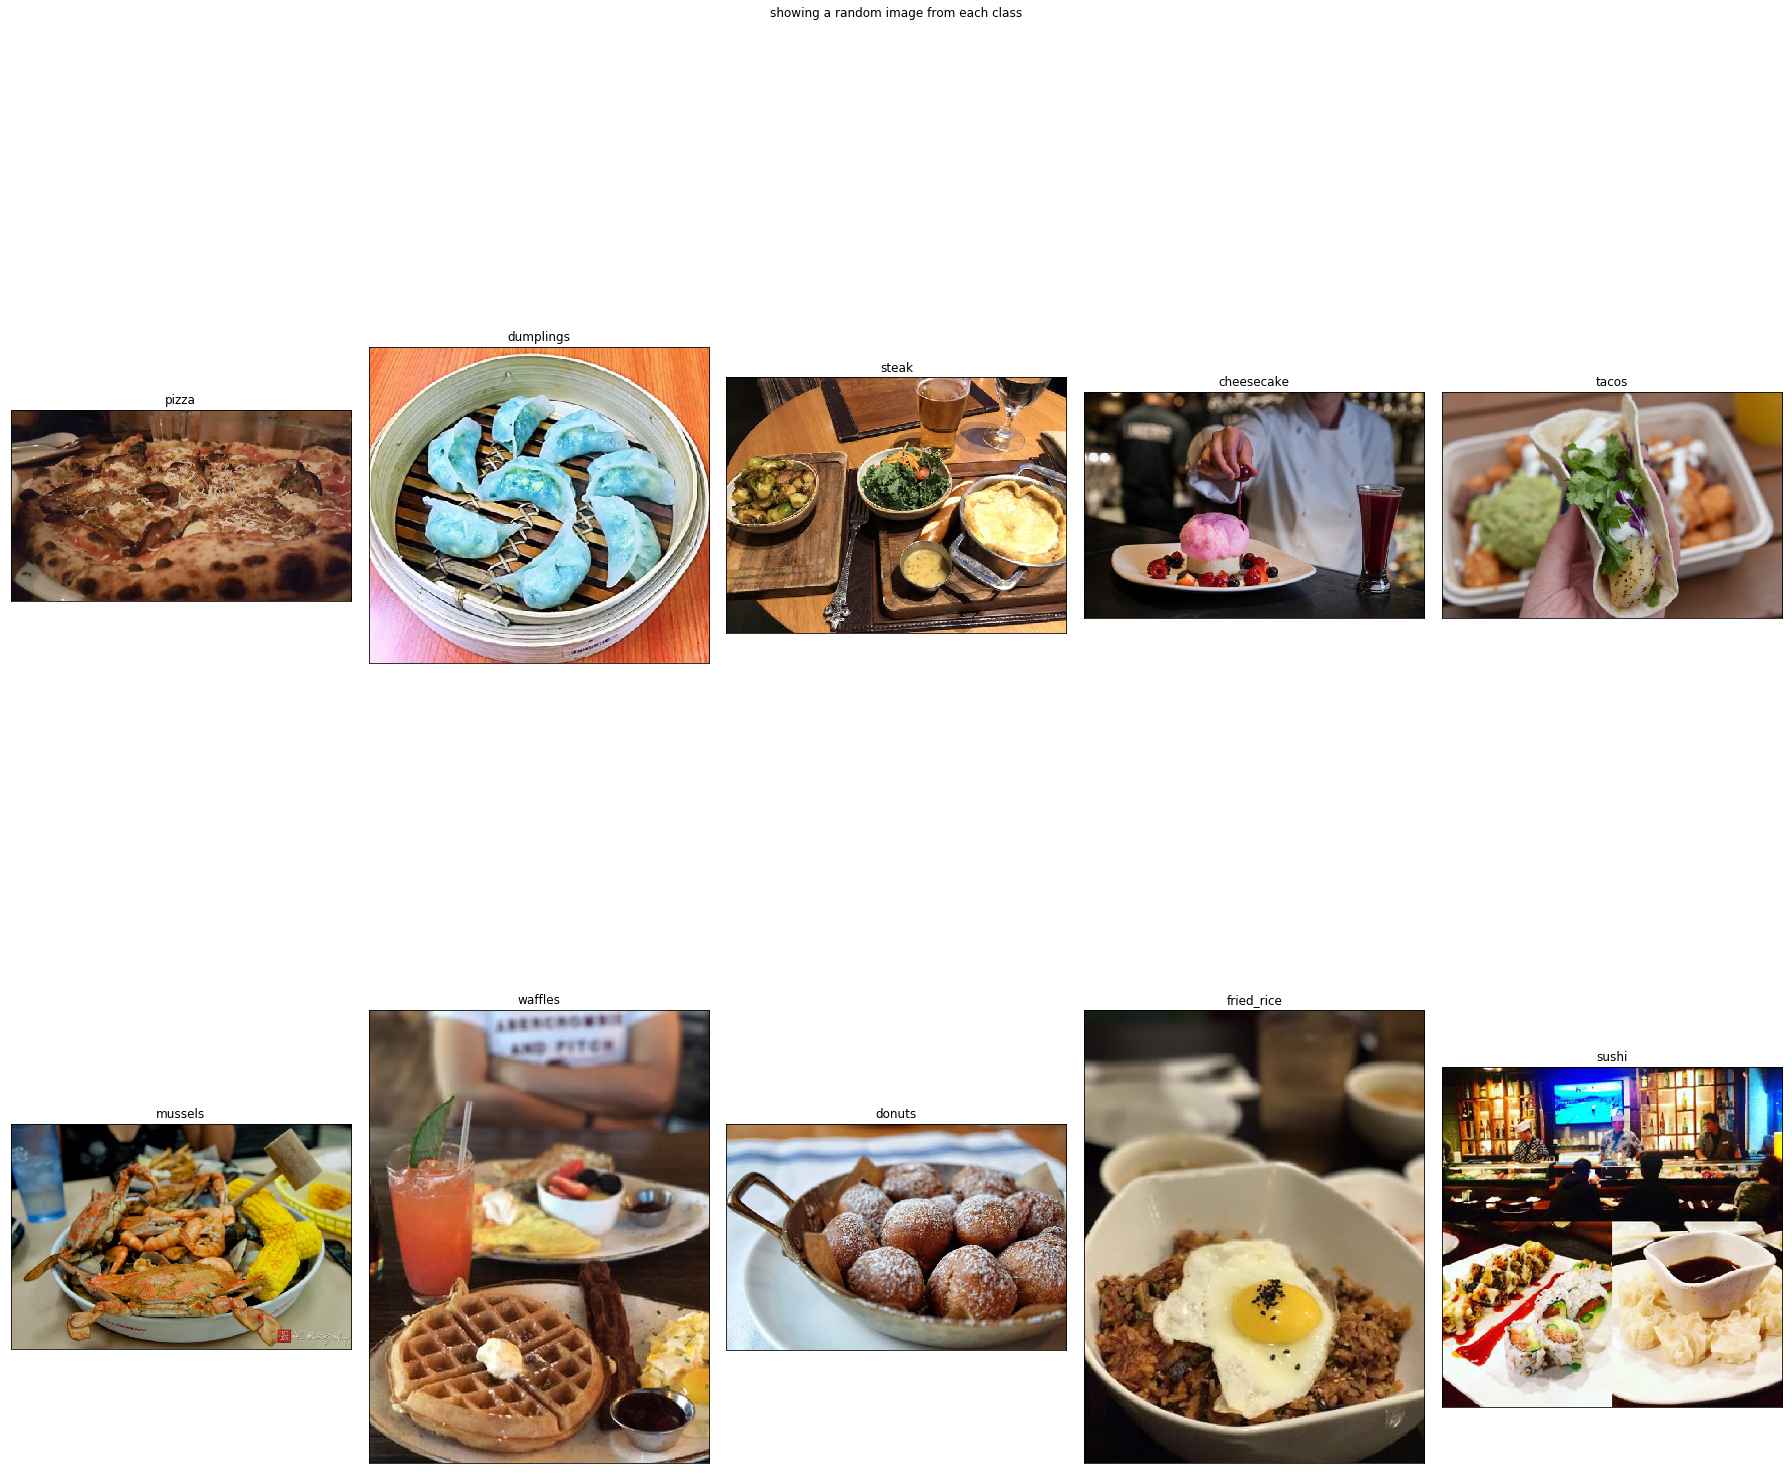

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline


rows = 2
cols = 5

fig, ax = plt.subplots(rows, cols, figsize = (25,25))
fig.suptitle("showing a random image from each class")
root_dir = "./cleanedDatasets/"
foodsList = list(foodClass)
print(foodsList)
foodId = 0 
for i in range(rows):
    for j in range(cols):
        selectedFood= foodsList[foodId]
        foodId+=1
        foodPictures = os.listdir(os.path.join(root_dir,selectedFood))
        selectedPicture = np.random.choice(foodPictures)
        img = plt.imread(os.path.join(root_dir,selectedFood, selectedPicture)) 
        ax[i][j].imshow(img)
        ax[i][j].set_title(selectedFood)
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()